In [37]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import numpy as np

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = True

In [38]:
# defines functions
def attack_damage(ph, pc, dc):
    return ph + pc*dc

def attack_damage_adv(ph, pc, dc):
    return ph*(2 - ph - 2*pc) + dc*pc*(2 - pc)

def attack_damage_dis(ph, pc, dc):
    return ph*(ph + 2*pc) + dc*pc*pc

def attack_bonus_adv(ph, pc, dc):
    d = attack_damage(ph, pc, dc)
    da = attack_damage_adv(ph, pc, dc)
    return 20*(da - d) # 20*(ph*(1 - ph - 2*pc) + dc*pc*(1 - pc))

def attack_bonus_dis(ph, pc, dc):
    d = attack_damage(ph, pc, dc)
    dd = attack_damage_dis(ph, pc, dc)
    return 20*(dd - d)  # 20*(ph*(ph + 2*pc - 1) + dc*pc*(pc - 1))

def save_damage(pf, ds):
    return (1 - ds)*pf + ds

def save_damage_dis(pf, ds):
    return (1 - ds)*pf*(2 - pf) + ds

advantage on attacks:
d_c = 1.5:
  delta AB = 5.0
  delta pct = 37.22
d_c = 2.0:
  delta AB = 5.5
  delta pct = 39.29


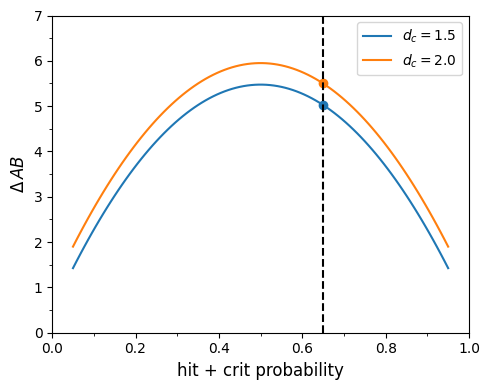

In [39]:
# plots the effective increase in AB from having advantage as a function of your chance to hit.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

pc = 0.05
ph_norm = 0.60
ph = np.linspace(0.0, 1 - 2*pc, 100)
print('advantage on attacks:')
for dc in [1.5, 2.0]:
    ax.plot(ph+0.05, attack_bonus_adv(ph, pc, dc), label=f'$d_c = {dc:.1f}$')
    ax.scatter([ph_norm + 0.05], attack_bonus_adv(ph_norm, pc, dc))
    print(f'd_c = {dc:.1f}:')
    print('  delta AB = {:.1f}'.format(attack_bonus_adv(ph_norm, pc, dc)))
    print('  delta pct = {:.2f}'.format(100*(attack_damage_adv(ph_norm, pc, dc)/attack_damage(ph_norm, pc, dc) - 1)))

ax.set(xlim=[0, 1.00], ylim=[0, 7])
ax.set_xlabel('hit + crit probability', fontsize=12)
ax.set_ylabel('$\Delta \, AB$', fontsize=12)
ax.legend()

ax.plot(2*[ph_norm + 0.05], [0,7], '--k')

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

if SAVEFIGS: plt.savefig('./fig-delta-ab-advantage.svg', metadata=METADATA)

disadvantage on attacks:
d_c = 1.5:
  delta AB = -5.0
  delta pct = -37.22


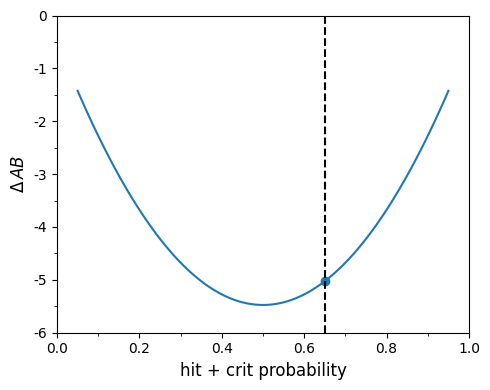

In [40]:
# plots the effective increase in AB from having disadvantage as a function of your chance to hit.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

pc = 0.05
dc = 1.50
ph_norm = 0.60

ph = np.linspace(0.0, 1 - 2*pc, 100)
print('disadvantage on attacks:')
for dc in [1.5]:
    ax.plot(ph+0.05, attack_bonus_dis(ph, pc, dc), label=f'$d_c = {dc:.1f}$')
    ax.scatter([ph_norm + 0.05], attack_bonus_dis(ph_norm, pc, dc))
    print(f'd_c = {dc:.1f}:')
    print('  delta AB = {:.1f}'.format(attack_bonus_dis(ph_norm, pc, dc)))
    print('  delta pct = {:.2f}'.format(100*(attack_damage_dis(ph_norm, pc, dc)/attack_damage(ph_norm, pc, dc) - 1)))

ax.set(xlim=[0, 1.00], ylim=[-6, 0])
ax.set_xlabel('hit + crit probability', fontsize=12)
ax.set_ylabel('$\Delta \, AB$', fontsize=12)

ax.plot(2*[ph_norm + 0.05], [-6,0], '--k')

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

if SAVEFIGS: plt.savefig('./fig-delta-ab-disadvantage.svg', metadata=METADATA)

disadvantage on saving throws:
d_s = 0.5:
  delta DC = 2.3
  delta pct = 13.79
d_s = 0.0:
  delta DC = 4.6
  delta pct = 35.00


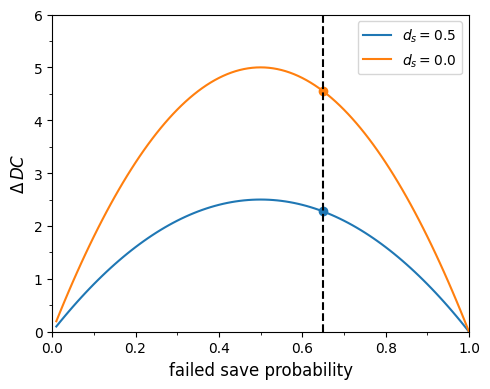

In [41]:
# plots the effective increase in DC from having disadvantage on saving throws as a function of your chance to fail the save.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ds = 0.5
pf_norm = 0.65

pf = np.linspace(0.01, 1.00, 100)
print('disadvantage on saving throws:')
for ds in [0.5, 0.0]:
    ax.plot(pf, 20*(save_damage_dis(pf, ds) - save_damage(pf, ds)), label=f'$d_s = {ds:.1f}$')
    ax.scatter([pf_norm], 20*(save_damage_dis(pf_norm, ds) - save_damage(pf_norm, ds)))
    print(f'd_s = {ds:.1f}:')
    print('  delta DC = {:.1f}'.format(20*(save_damage_dis(pf_norm, ds) - save_damage(pf_norm, ds))))
    print('  delta pct = {:.2f}'.format(100*((save_damage_dis(pf_norm, ds)/save_damage(pf_norm, ds)) - 1)))

ax.set(xlim=[0, 1.00], ylim=[0, 6])
ax.set_xlabel('failed save probability', fontsize=12)
ax.set_ylabel('$\Delta \, DC$', fontsize=12)

ax.plot(2*[pf_norm], [0,6], '--k')

ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

if SAVEFIGS: plt.savefig('./fig-delta-dc-disadvantage.svg', metadata=METADATA)

auto-fail saving throws:
d_s = 0.5:
  delta DC = 3.5
  delta pct = 21.21
d_s = 0.0:
  delta DC = 7.0
  delta pct = 53.85


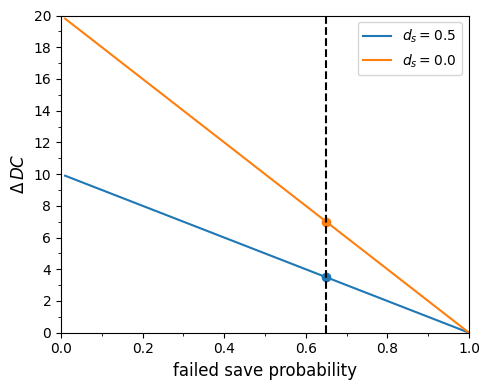

In [42]:
# plots the effective increase in DC from automatically failing as a function of your chance to fail the save.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

pf = np.linspace(0.01, 1.00, 100)
pf_norm = 0.65
print('auto-fail saving throws:')
for ds in [0.5, 0.0]:
    ax.plot(pf, 20*(1 - save_damage(pf, ds)), label=f'$d_s = {ds:.1f}$')
    ax.scatter([pf_norm], 20*(1 - save_damage(pf_norm, ds)))
    print(f'd_s = {ds:.1f}:')
    print('  delta DC = {:.1f}'.format(20*(save_damage(1, ds) - save_damage(pf_norm, ds))))
    print('  delta pct = {:.2f}'.format(100*((save_damage(1, ds)/save_damage(pf_norm, ds)) - 1)))

ax.set(xlim=[0, 1.00], ylim=[0, 20])
ax.set_xlabel('failed save probability', fontsize=12)
ax.set_ylabel('$\Delta \, DC$', fontsize=12)

ax.plot(2*[pf_norm], [0,20], '--k')

ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

#if SAVEFIGS: plt.savefig('./fig-delta-dc-autofail.svg', metadata=METADATA)

In [43]:
# inability to take action
print('no action:')
print('attacks (d_c = 1.5):')
print('  delta AB = {:.1f}'.format(-20*attack_damage(0.6, 0.05, 1.5)))

print('saves (d_s = 0.5):')
print('  delta DC = {:.1f}'.format(20*save_damage(0.65, 0.5)))

print('saves (d_s = 0.0):')
print('  delta DC = {:.1f}'.format(-20*save_damage(0.65, 0.0)))

no action:
attacks (d_c = 1.5):
  delta AB = -13.5
saves (d_s = 0.5):
  delta DC = 16.5
saves (d_s = 0.0):
  delta DC = -13.0


In [44]:
# paralyzed condition
print('paralyzed:')
print('attacks (d_c = 1.5):')
print('  delta AB = {:.1f}'.format(20*(0.5*attack_damage_adv(0.6, 0.05, 1.5) - attack_damage(0.6, 0.05, 1.5))))
print('  delta pct = {:.2f}'.format(100*(0.5*attack_damage_adv(0.6, 0.05, 1.5)/attack_damage(0.6, 0.05, 1.5) - 1.0)))

print('saves (d_s = 0.5):')
print('  delta DC = {:.1f}'.format(20*(0.5*save_damage_dis(0.65, 0.5) - save_damage(0.65, 0.5))))
print('  delta pct = {:.2f}'.format(100*(0.5*save_damage_dis(0.65, 0.5)/save_damage(0.6, 0.5) - 1.0)))

print('saves (d_s = 0.0):')
print('  delta DC = {:.1f}'.format(20*(0.5*save_damage_dis(0.65, 0.0) - save_damage(0.65, 0.0))))
print('  delta pct = {:.2f}'.format(100*(0.5*save_damage_dis(0.65, 0.0)/save_damage(0.6, 0.0) - 1.0)))

paralyzed:
attacks (d_c = 1.5):
  delta AB = -4.2
  delta pct = -31.39
saves (d_s = 0.5):
  delta DC = -7.1
  delta pct = -41.33
saves (d_s = 0.0):
  delta DC = -4.2
  delta pct = -26.87


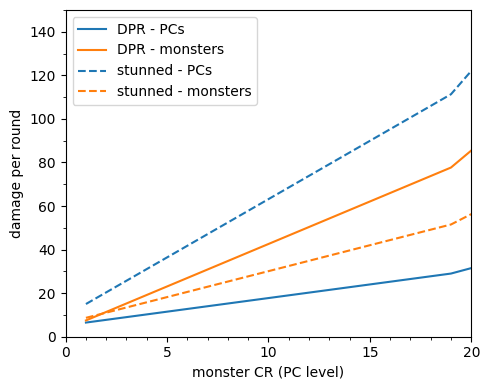

In [45]:
# compares the stunned condition for PCs and monsters
import pandas as pd

CONDITIONS = {
    'Blinded':       {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.00},
    'Charmed':       {'Enemy Attacks':  0.00, 'Enemy Saves':  0.00, 'Ally Attacks':  0.00, 'Ally Saves':  0.00},
    'Deafened':      {'Enemy Attacks':  0.00, 'Enemy Saves':  0.00, 'Ally Attacks':  0.00, 'Ally Saves':  0.00},
    'Frightened':    {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.00, 'Ally Saves':  0.00},
    'Grappled':      {'Enemy Attacks':  0.00, 'Enemy Saves':  0.00, 'Ally Attacks':  0.00, 'Ally Saves':  0.00},
    'Incapacitated': {'Enemy Attacks': -1.00, 'Enemy Saves': -1.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.00},
    'Invisible':     {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.00},
    'Paralyzed':     {'Enemy Attacks': -1.00, 'Enemy Saves': -1.00, 'Ally Attacks':  0.98, 'Ally Saves':  0.21}, #  21-54%
    'Petrified':     {'Enemy Attacks': -1.00, 'Enemy Saves': -1.00, 'Ally Attacks': -0.35, 'Ally Saves': -0.27}, # -27-55%
    'Poisoned':      {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.00, 'Ally Saves':  0.00},
    'Prone':         {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.00},
    'Restrained':    {'Enemy Attacks': -0.37, 'Enemy Saves':  0.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.14}, #  14-35%
    'Stunned':       {'Enemy Attacks': -1.00, 'Enemy Saves': -1.00, 'Ally Attacks':  0.37, 'Ally Saves':  0.21}, #  21-54%
    'Unconscious':   {'Enemy Attacks': -1.00, 'Enemy Saves': -1.00, 'Ally Attacks':  0.98, 'Ally Saves':  0.21}, #  21-54%
}

dfD = pd.read_csv('../../assets/data/dmg-targets-cr-and-xp.csv') # 'CR','PB','XP','AC','HP Mean','AB','DPR Mean'
dfD = dfD[dfD['CR'].between(1, 20)]
n_targets = 1
n_pcs = 4
n_mons = 1
pc_DPR = dfD['HP Mean']/12
mon_DPR = 0.65*dfD['DPR Mean']

colors = ['#7f7f7f','#1f77b4','#ff7f0e','#2ca02c']

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes(xlim=[0,20], ylim=[0,150], xlabel='monster CR (PC level)', ylabel='damage per round')

ax.plot(dfD['CR'], pc_DPR, '-', color=colors[1], label='DPR - PCs')
ax.plot(dfD['CR'], mon_DPR, '-', color=colors[2], label='DPR - monsters')

for cond in ['Stunned']:
    c = CONDITIONS[cond]

    mon_weight = -c['Enemy Attacks']
    pc_weight = 0.5*(c['Ally Attacks'] + c['Ally Saves'])
    ax.plot(dfD['CR'], n_targets*mon_weight*mon_DPR + n_pcs*pc_weight*pc_DPR, 
        '--', color=colors[1], label=f'{cond.lower()} - PCs')

    pc_weight = -c['Enemy Attacks']
    mon_weight = 0.5*(c['Ally Attacks'] + c['Ally Saves'])
    ax.plot(dfD['CR'], n_mons*mon_weight*mon_DPR + n_targets*pc_weight*pc_DPR, 
        '--', color=colors[2], label=f'{cond.lower()} - monsters')
    
ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(10))

if SAVEFIGS: plt.savefig('./fig-dpr-stunned-illustrative.svg', metadata=METADATA)

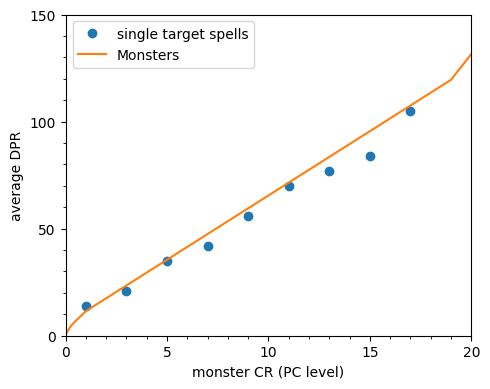

In [47]:
# compares single target spell damage budget against typical monster damage
import dice_equations as deq
import numpy as np
import pandas as pd

def cantrip_damage(lvl, targets='single', save_for_half=False):
    """Returns cantrip damage dice equation.
    lvl -- spellcasting level between 1 and 20
    targets -- either 'single' or 'multiple'
    save_for_half -- True if the cantrip deals half damage on save.
    """
    n = np.sum(np.array([1,5,11,17]) <= lvl)
    if targets == 'single':
        if save_for_half:
            damage = '{:d}d10'.format(n)
        else:
            damage = '{:d}d6'.format(2*n)
    elif targets == 'multiple':
        if save_for_half:
            damage = '{:d}d6'.format(n)
        else:
            damage = '{:d}d8'.format(n)

    return damage

def spell_damage_list(lvl, targets='single', save_for_half=False):
    ctrpDmg = cantrip_damage(lvl, targets, save_for_half)
    if targets == 'single':
        if save_for_half:
            damage_list = [ctrpDmg,'2d10','3d10', '5d10', '6d10', '8d10','10d10','11d10','12d10','15d10']
        else:
            damage_list = [ctrpDmg, '4d6', '6d6', '10d6', '12d6', '16d6', '20d6', '22d6', '24d6', '30d6']
    elif targets == 'multiple':
        if save_for_half:
            damage_list = [ctrpDmg,'2d6','4d6','6d6','7d6', '8d6','11d6','12d6','13d6','14d6']
        else:
            damage_list = [ctrpDmg,'2d8','4d8','6d8','7d8', '8d8','11d8','12d8','13d8','14d8']
    
    return damage_list

def spell_damage_average(sp_lvl=0, lvl=1, targets='single', save_for_half=False):
    damage_list = spell_damage_list(lvl, targets, save_for_half)
    return deq.roll_average(damage_list[sp_lvl])


# create figure
fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes(xlim=[0,20], ylim=[0,150], xlabel='monster CR (PC level)', ylabel='average DPR')

levels = [max(1, sp_lvl*2-1) for sp_lvl in range(1, 10)]
sp_damage = [spell_damage_average(sp_lvl, max(1, sp_lvl*2-1)) for sp_lvl in range(1, 10)]
ax.plot(levels, sp_damage, 'o', label=f'single target spells')

dfD = pd.read_csv('../../assets/data/dmg-targets-cr-and-xp.csv') # 'CR','PB','XP','AC','HP Mean','AB','DPR Mean'
ax.plot(dfD['CR'], dfD['DPR Mean'], label='Monsters')

ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(10))